<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\c'
C:\Users\davib\AppData\Local\Temp\ipykernel_23260\2775497638.py:61: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Time response y$_k$(u) = g$\cdot$u$_k$")
c:\Users\davib\miniconda3\envs\sippy\Lib\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


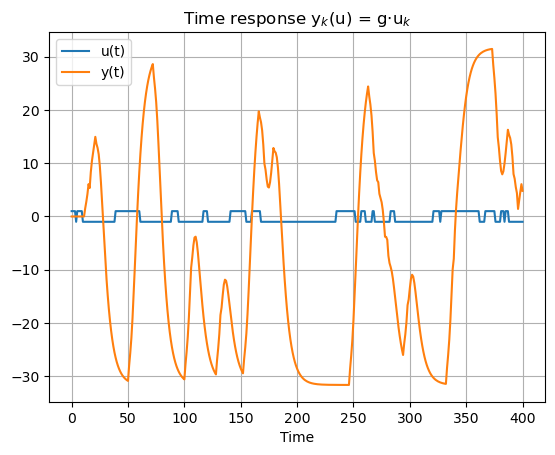

In [1]:
#!/usr/bin/env python
# coding: utf-8
"""
ARMAX Example

@author: Giuseppe Armenise, revised by RBdC
"""

from __future__ import division
from past.utils import old_div
from sippy import functionset as fset
from sippy import *
import numpy as np
import control.matlab as cnt
import matplotlib.pyplot as plt

## TEST IDENTIFICATION METHODS for ARMAX model

# Define sampling time and Time vector
sampling_time = 1.                                  # [s]
end_time = 400                                      # [s]
npts = int(old_div(end_time, sampling_time)) + 1
Time = np.linspace(0, end_time, npts)

# Define Generalize Binary Sequence as input signal
switch_probability = 0.08  # [0..1]
[Usim,_,_] = fset.GBN_seq(npts, switch_probability, Range = [-1, 1])

# Define white noise as noise signal
white_noise_variance = [0.01]
e_t = fset.white_noise_var(Usim.size, white_noise_variance)[0]

# ## Define the system (ARMAX model)

# ### Numerator of noise transfer function has two roots: nc = 2

NUM_H = [1., 0.3, 0.2, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

# ### Common denominator between input and noise transfer functions has 4 roots: na = 4

DEN = [1., -2.21, 1.7494, -0.584256, 0.0684029, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

# ### Numerator of input transfer function has 3 roots: nb = 3

NUM = [1.5, -2.07, 1.3146]

# ### Define transfer functions

g_sample = cnt.tf(NUM, DEN, sampling_time)
h_sample = cnt.tf(NUM_H, DEN, sampling_time)

# ## Time responses

# ### Input reponse

Y1, Time, Xsim = cnt.lsim(g_sample, Usim, Time)
plt.figure(0)
plt.plot(Time, Usim)
plt.plot(Time, Y1)
plt.xlabel("Time")
plt.title("Time response y$_k$(u) = g$\cdot$u$_k$")
plt.legend(['u(t)', 'y(t)'])
plt.grid()
plt.show()